In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_csv(csv_files, dataset, methods, model):

    colors = sns.color_palette("hls", n_colors=len(methods))
    fig, ax = plt.subplots(figsize=(10, 6))

    # Read csv file
    for i, (csv_file, method) in enumerate(zip(csv_files, methods)):

        df = pd.read_csv(csv_file)

        # number of tasks
        num_tasks = df.shape[1] - 3
        if dataset == "Core50":
            all_results = df.loc[:, df.columns[1:-3]].values
        else:
            all_results = df.loc[:, df.columns[1:-2]].values
        seeds = len(all_results)
        mean = all_results.mean(axis=0)
        std = all_results.std(axis=0)

        plt.plot(mean, label=method, color=colors[i], ls='-')
        ax.scatter(range(all_results.shape[1]), mean, color=colors[i])
        ax.fill_between(range(len(mean)), mean-std, mean+std, linewidth=1, color=colors[i], alpha=0.1)

        ax.set_xticks(range(num_tasks))
        ax.set_xticklabels(range(1, num_tasks+1))
        ax.set_xlabel('Tasks')
        ax.set_ylabel('Accuracy')
        ax.set_title(f'Avg {seeds} seeds on {dataset} dataset - model {model}')
        ax.legend()
    plt.grid()
    plt.show()


['Finetuning', 'CDD1000', 'replay1000', 'replay32']


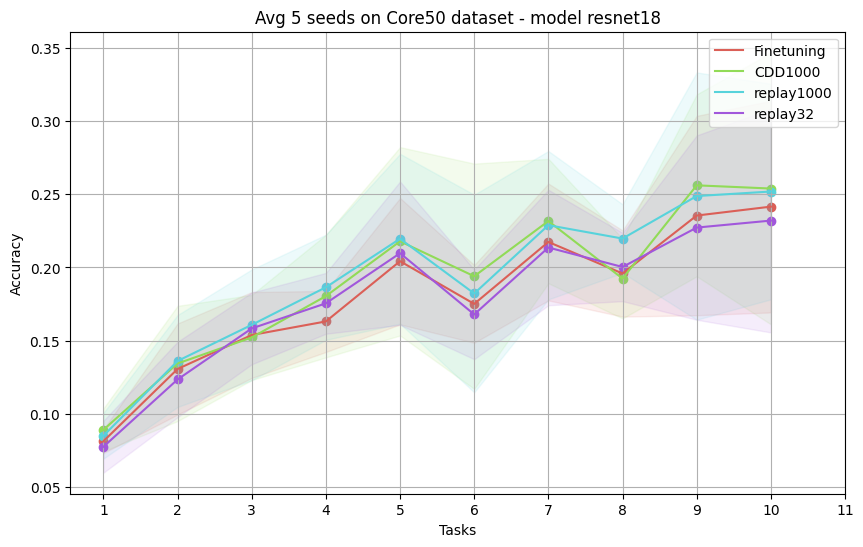

In [6]:
csv_files=["csv/Core50_11tasks_Finetuning_resnet18_epochs1.csv", 
           "csv/Core50_11tasks_CDD1000_resnet18_epochs1.csv",
           "csv/Core50_11tasks_replay1000_resnet18_epochs1.csv",
           "csv/Core50_11tasks_replay32_resnet18_epochs1.csv"]

methods = [x.split('_')[2] for x in csv_files]
print(methods)
plot_csv(csv_files, "Core50", methods, 'resnet18')

['Finetuning', 'CDD1000', 'replay1000', 'replay32']


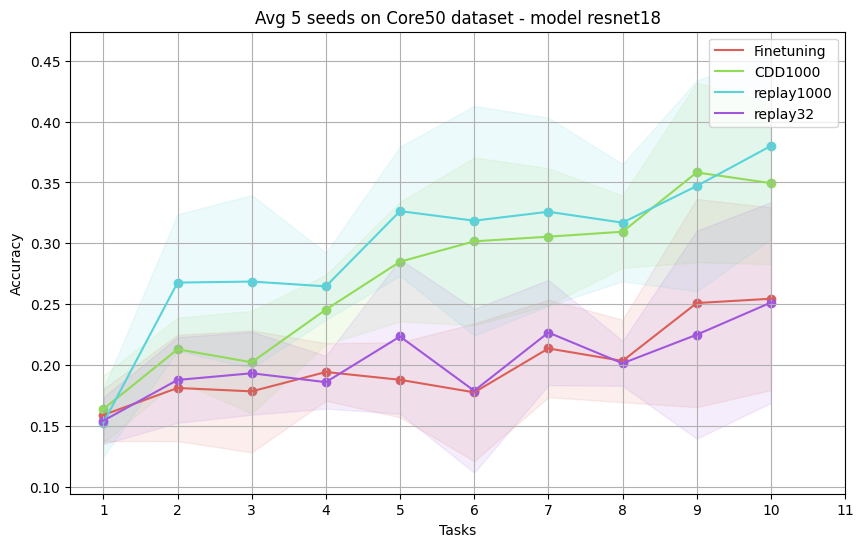

In [7]:
csv_files=["csv/Core50_11tasks_Finetuning_resnet18_epochs10.csv", 
           "csv/Core50_11tasks_CDD1000_resnet18_epochs10.csv",
           "csv/Core50_11tasks_replay1000_resnet18_epochs10.csv",
           "csv/Core50_11tasks_replay32_resnet18_epochs10.csv"]

methods = [x.split('_')[2] for x in csv_files]
print(methods)
plot_csv(csv_files, "Core50", methods, 'resnet18')

In [ ]:
(500*3*128*128)/(5*50*12*16*16)->1000*3*128*128

In [ ]:
(5*50)(12*16*16)

In [ ]:
500/32